# Imports

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
from statistics import mode
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Loading of Data

In [2]:
df_train = pd.read_csv(r"D:\MY DATA\PYTHON DATA SCIENCE\Titanic_Survival\train.csv")
df_test = pd.read_csv(r"D:\MY DATA\PYTHON DATA SCIENCE\Titanic_Survival\test.csv")

In [3]:
print(df_train.shape,'\n')
print(df_test.shape)

(891, 12) 

(418, 11)


In [4]:
print(df_train.info,'\n')
print(df_test.info)

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [5]:
print(df_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [6]:
print(df_test.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [7]:
print('The number of samples into the train data is {}.'.format(df_train.shape[0]))
print('The number of samples into the train data is {}.'.format(df_test.shape[0]))

The number of samples into the train data is 891.
The number of samples into the train data is 418.


# Find missing values

In [8]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

1) Age

[Text(0.5, 0, 'Age')]

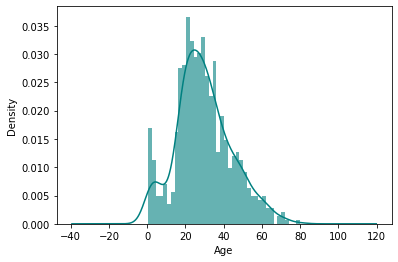

In [10]:
ax = df_train["Age"].hist(bins=40, density=True, stacked=True, color='teal', alpha=0.6)
df_train["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')

In [11]:
# mean age
print('The mean of "Age" is %.2f' %(df_train["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(df_train["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


In [12]:
# mean age
print('The mean of "Age" is %.2f' %(df_test["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(df_test["Age"].median(skipna=True)))

The mean of "Age" is 30.27
The median of "Age" is 27.00


2) Embarked

In [13]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

3) Cabin

In [14]:
df_train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
E101           3
              ..
A16            1
C95            1
B3             1
C91            1
C110           1
Name: Cabin, Length: 147, dtype: int64

In [15]:
df_test.Cabin.value_counts()

B57 B59 B63 B66    3
A34                2
F4                 2
C23 C25 C27        2
E34                2
                  ..
D                  1
C22 C26            1
E50                1
C106               1
C130               1
Name: Cabin, Length: 76, dtype: int64

# Fill missing values

In [16]:
df_train["Age"].fillna(df_train["Age"].median(skipna=True), inplace=True)
df_train['Embarked'] = df_train['Embarked'].fillna(mode(df_train['Embarked']))
df_train['Cabin'] = df_train['Cabin'].fillna('U')


In [17]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
df_test["Age"].fillna(df_test["Age"].median(skipna=True), inplace=True)
df_test['Cabin'] = df_test['Cabin'].fillna('U')
df_test['Fare']  = df_test.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))

In [19]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Feature Engineering

1) Sex

In [20]:
df_train.Sex.unique()

array(['male', 'female'], dtype=object)

In [21]:
df_train['Sex'][df_train['Sex'] == 'male'] = 0
df_train['Sex'][df_train['Sex'] == 'female'] = 1

df_test['Sex'][df_test['Sex'] == 'male'] = 0
df_test['Sex'][df_test['Sex'] == 'female'] = 1

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\HP\Anaconda3\

2) Embarked

In [22]:
df_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [23]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

temp = pd.DataFrame(encoder.fit_transform(df_train[['Embarked']]).toarray(), columns=['C', 'Q', 'S'])
df_train = df_train.join(temp)
df_train.drop(columns='Embarked', inplace=True)

temp = pd.DataFrame(encoder.transform(df_test[['Embarked']]).toarray(), columns=['C', 'Q', 'S'])
df_test = df_test.join(temp)
df_test.drop(columns='Embarked', inplace=True)

In [24]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'C', 'Q', 'S'],
      dtype='object')

3) Cabin

In [28]:
df_train['Cabin'] = df_train['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())
df_test['Cabin'] = df_test['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())

In [29]:
df_train.Cabin.unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [30]:
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}
df_train['Cabin'] = df_train['Cabin'].map(cabin_category)
df_test['Cabin'] = df_test['Cabin'].map(cabin_category)

4) Names

In [31]:
df_train['Name'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
df_test['Name'] = df_test.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [32]:
df_train['Name'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

In [33]:
df_train.rename(columns={'Name' : 'Title'}, inplace=True)
df_train['Title'] = df_train['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')
                                      
df_test.rename(columns={'Name' : 'Title'}, inplace=True)
df_test['Title'] = df_test['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

In [34]:
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [35]:
encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(df_train[['Title']]).toarray())
df_train = df_train.join(temp)
df_train.drop(columns='Title', inplace=True)

temp = pd.DataFrame(encoder.transform(df_test[['Title']]).toarray())
df_test = df_test.join(temp)
df_test.drop(columns='Title', inplace=True)

5) Family size

In [36]:
df_train['familySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['familySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [37]:
# Drop redundant features
df_train = df_train.drop(['SibSp', 'Parch', 'Ticket'], axis = 1)
df_test = df_test.drop(['SibSp', 'Parch', 'Ticket'], axis = 1)

In [38]:
df_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,C,Q,S,0,1,2,3,4,familySize
0,1,0,3,0,22.0,7.2500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
1,2,1,1,1,38.0,71.2833,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,3,1,3,1,26.0,7.9250,9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
3,4,1,1,1,35.0,53.1000,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
4,5,0,3,0,35.0,8.0500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
5,6,0,3,0,28.0,8.4583,9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
6,7,0,1,0,54.0,51.8625,5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
7,8,0,3,0,2.0,21.0750,9,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5
8,9,1,3,1,27.0,11.1333,9,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3
9,10,1,2,1,14.0,30.0708,9,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2


# Different machine learning models for predictions

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['Survived', 'PassengerId'], axis=1), 
                                                    df_train['Survived'], test_size = 0.2, random_state=2)

1) Linear Regression

In [40]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

#R-Squared Score
lin_reg_train = ("R-Squared for Train set: {:.3f}".format(linreg.score(X_train, y_train)))
print(lin_reg_train)
lin_reg_test = ("R-Squared for test set: {:.3f}" .format(linreg.score(X_test, y_test)))
print(lin_reg_test)

R-Squared for Train set: 0.459
R-Squared for test set: 0.370


2) Logistic Regression 

In [41]:
logreg = LogisticRegression(max_iter=10000, C=50)
logreg.fit(X_train, y_train)

#R-Squared Score
log_reg_train = ("R-Squared for Train set: {:.3f}".format(logreg.score(X_train, y_train)))
print(log_reg_train)
log_reg_test = ("R-Squared for test set: {:.3f}" .format(logreg.score(X_test, y_test))) 
print(log_reg_test)

R-Squared for Train set: 0.844
R-Squared for test set: 0.788


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


3) Feature Scaling

In [42]:
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.transform(X_test)

In [43]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_scale, y_train)

#R-Squared Score
print("R-Squared for Train set: {:.3f}".format(logreg.score(X_train_scale, y_train)))
print("R-Squared for test set: {:.3f}" .format(logreg.score(X_test_scale, y_test)))

R-Squared for Train set: 0.843
R-Squared for test set: 0.793


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


4) KNN Classifier

In [44]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train_scale, y_train)
y_pred = knn.predict(X_test_scale)

In [45]:
KNN = ("Accuracy:",accuracy_score(y_test, y_pred))
print(KNN)

('Accuracy:', 0.7988826815642458)


5) Support Vector Machine(SVM)

In [46]:
svc_lin = SVC(kernel = 'linear', random_state = 0)
svc_lin.fit(X_train_scale, y_train)
Y_pred = svc_lin.predict(X_test_scale)
SVM = ("Accuracy:",round(svc_lin.score(X_train_scale, y_train) * 100, 2))
print(SVM)

('Accuracy:', 84.13)


6) Gausiian Naive Bayes

In [47]:
gauss = GaussianNB()
gauss.fit(X_train_scale, y_train)
y_pred = gauss.predict(X_test_scale)
GNB = ("Accuracy:",accuracy_score(y_test, y_pred))
print(GNB)

('Accuracy:', 0.770949720670391)


7) Decision Tree

In [48]:
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train_scale, y_train)
y_pred = tree.predict(X_test_scale)
Decision_Tree = ("Accuracy:",accuracy_score(y_test, y_pred))
print(Decision_Tree)

('Accuracy:', 0.776536312849162)


8) Random Forest

In [49]:
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train_scale, y_train)
y_pred = forest.predict(X_test_scale)
Random_Forest = ("Accuracy:",accuracy_score(y_test, y_pred))
print(Random_Forest)

('Accuracy:', 0.7877094972067039)


# All Model Accuracy

In [50]:
#Linear Model
print("Linear Regression Train:", lin_reg_train)
print("Linear Regression Test:", lin_reg_test)
print()

#Logistic Regression
print("Logistic Regression Train:", log_reg_train)
print("Logistic Regression Test:", log_reg_test)
print()

#KNN Classifier
print("KNN:",KNN)
print()

#SVM
print('SVM:', SVM)
print()

#GNB
print("GNB:", GNB)
print()

#Decision Tree
print("Decision Tree:", Decision_Tree)
print()

#Random Forest
print("Random Forest:", Random_Forest)
print()


Linear Regression Train: R-Squared for Train set: 0.459
Linear Regression Test: R-Squared for test set: 0.370

Logistic Regression Train: R-Squared for Train set: 0.844
Logistic Regression Test: R-Squared for test set: 0.788

KNN: ('Accuracy:', 0.7988826815642458)

SVM: ('Accuracy:', 84.13)

GNB: ('Accuracy:', 0.770949720670391)

Decision Tree: ('Accuracy:', 0.776536312849162)

Random Forest: ('Accuracy:', 0.7877094972067039)



As linear SVC classifier of SVM gives more accuracy than other methods, so it is used for training data.

# Submitting Solution

In [51]:
df_train_conv = sc.fit_transform(df_train.drop(['Survived', 'PassengerId'], axis=1))
df_test_conv = sc.transform(df_test.drop(['PassengerId'], axis = 1))

In [52]:
svcclf = SVC(gamma=50)
svcclf.fit(df_train_conv, df_train['Survived'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
df_test['Survived'] = svcclf.predict(df_test_conv)

In [54]:
submission = df_test[['PassengerId', 'Survived']]
submission.to_csv('Final Submission.csv', index = False)